In [ ]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt

import importlib

from astroLuSt.synthetics import dataaugmentation as ald


In [ ]:
def generate_4d(
    shape:tuple=None,
    xmin:float=0, xmax:float=1,
    func=None
    ):
    if shape is None:
        shape = (1,20,1,1)
    if func is None:
        func = lambda x: x
    X = np.empty(shape)
    for i, xi in enumerate(X):
        x_ = np.linspace(np.zeros((X.shape[-2],X.shape[-1]))+xmin, xmax, X.shape[1])
        
        hshift = np.random.rand(x_.shape[1]).reshape(1,-1,1)
        vshift = np.zeros_like(x_)+i
        cnoise = np.random.randn(x_.shape[0], x_.shape[2]).reshape(50,1,-1)*0.1
        vshift[:,1,:] += X.shape[0]
        X[i] = func(x_+hshift) + vshift + cnoise

    return X

X = generate_4d(
    shape=(20,50,2,3),
    xmin=0, xmax=2*np.pi,
    # func=np.sin,
    func=None,
)
print(X.shape)
#visualize
fig = plt.figure()
ax1 = fig.add_subplot(111)
for x in X:
    ax1.plot(x[:,0,:], 'r-')
    # ax1.plot(x[:,1,0], 'r-')
    ax1.plot(x[:,1,:], 'b-')
ax1.set_xlabel('index')
ax1.set_ylabel('y')
plt.show()

AugmentAxis(
    nsamples=50, sample_weights=None,
    ntransformations=-1, methods=['add_noise', 'crop', 'flip_axis', 'obscure_observations', 'rescale', 'shift_features'],
    shift=(0, 20),
    flip=False,
    npoints=5, neighbors=True,
    fill_value_obscure=0, fill_value_range=(0, 1),
    cutout_start=0, cutout_size=0,
    interpkind='linear', fill_value_crop='extrapolate',
    noise_mag=0,
    feature_range_min=0, feature_range_max=(3, 9),
)
INFO(AugmentAxis.apply_transform):
    Applied the following transformations: ['flip_axis' 'obscure_observations' 'crop' 'shift_features']


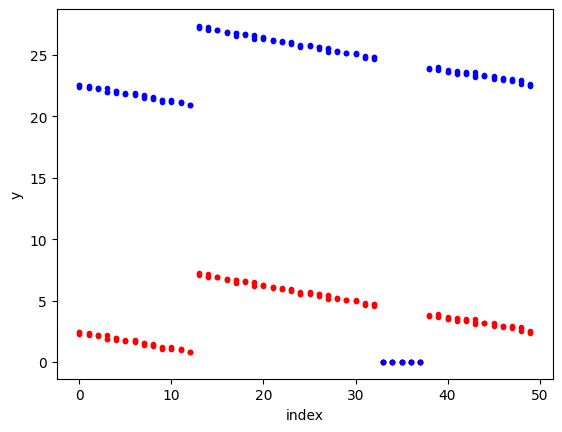

In [899]:
importlib.reload(ald)
AA = ald.AugmentAxis(
    nsamples=50, sample_weights=None,
    shift=(0,20), methods=None,
    npoints=5, neighbors=True,
    fill_value_obscure=0, fill_value_range=(0,1),
    interpkind=None, fill_value_crop=None,
    noise_mag=None,
    feature_range_min=0, feature_range_max=(3,9),
    axis=0,
    verbose=2,
)
print(AA)

# for i in range(1):
#     x_ = AA.shift_features(X[0], shift=None, axis=0)
    # x_ = AA.flip_axis(x_, axis=(0,2))
    # x_ = AA.obscure_observations(
    #     x_,
    #     npoints=(0,10), neighbors=False,
    #     # fill_value_obscure='random', fill_value_range=None,
    #     fill_value_obscure=0, fill_value_range=None,
    #     axis=(0)
    # )
    # x_ = AA.crop(
    #     x_,
    #     cutout_start=-1, cutout_size=(0,8),
    #     fill_value_crop=None, interpkind='nearest',
    #     axis=0
    # )
    # x_ = AA.add_noise(x_, noise_mag=(0,2), axis=(0))
    # x_ = AA.rescale(x_, feature_range_min=0, feature_range_max=(7,9), axis=0)

x_ = AA.apply_transform(X[0],
    ntransformations=4,
    transform_parameters={'noise_mag':3,'axis':(0)},
    methods=None,
    # methods=[ 'obscure_observations', 'rescale',],
    # methods=[ 'obscure_observations'],
    # methods=[ 'rescale'],
)

#visualize
fig = plt.figure()
ax1 = fig.add_subplot(111)
# for x in X_:
# ax1.plot(X[0,:,0,:], 'r-')
# ax1.plot(X[0,:,1,:], 'b-')
ax1.plot(x_[:,0,:], 'r.')
ax1.plot(x_[:,1,:], 'b.')
# ax1.plot(x_[:,1,0], 'b.')
# ax1.plot(x_[:,1,1], 'r.')
# ax1.plot(x_[:,1,2], 'g.')
ax1.set_xlabel('index')
ax1.set_ylabel('y')
plt.show()